Mapping the problem to quantum circuit
Quantum tele will always use 3 qubits (1 for Alice/Bob, 1 for secret state that is being teleported) A and B are entangled. 

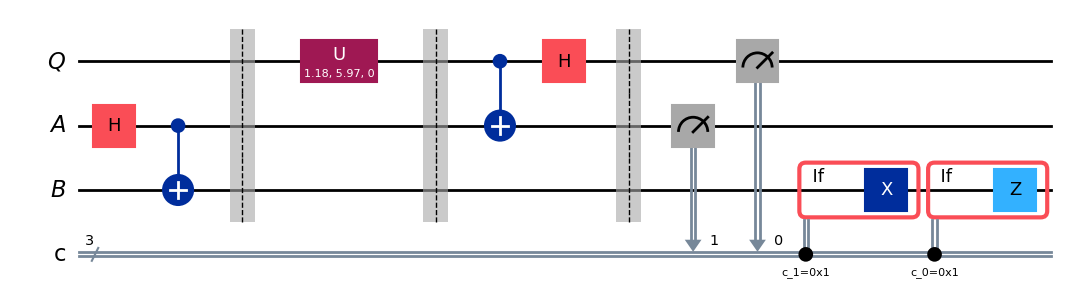

In [ ]:

from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np
 
secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")
 
cr = ClassicalRegister(3, "c") # where the measurement results will be stored
 
qc = QuantumCircuit(secret, Alice, Bob, cr)
 
qc.h(Alice) #applying hardmard to alice and then cnot between alice and bob
qc.cx(Alice, Bob) #second arg is target
 
##from here

qc.barrier() #just visual, not quantum operation
 
#just randomizing the secrect qubit
np.random.seed(42)  # fixing seed for repeatability
theta = np.random.uniform(0.0, 1.0) * np.pi  #random angle for random quantum state
varphi = np.random.uniform(0.0, 2.0) * np.pi  #random phase for random quantum state
qc.u(theta, varphi, 0.0, secret) #putting the random quantum into positions with the random angle/phase we found above
qc.barrier() #just visual, not quantum operation
 
# CNOT -> Hadamard with secret and Alice, to get a bell measurement
# bell measurement allows for the actual teleportation(figures out which of the 4 bell states we r in)
qc.cx(secret, Alice)
qc.h(secret)
qc.barrier()

#needa measure both alice and secret qubit inorder for bob to get the info he needs
qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])
 
#insert some conditional logic. If Alice measures Q in a "1" we need a Z gate, and if Alice measures A in a "1" we need an X gate (see the table).
with qc.if_test((cr[1], 1)): #following the table logic in the notes
    qc.x(Bob)
with qc.if_test((cr[0], 1)):
    qc.z(Bob)
 
qc.draw(output="mpl")